In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix
from sklearn.utils import resample
import math
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_pickle('../data/all_enron_emails_preprocessed.pkl')

In [3]:
df.drop(['responses', 'is_reply'], axis=1, inplace=True)
df.fillna(0, inplace=True)

In [4]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
y_train = train['answered']
X_train = train.drop(columns='answered')
y_test = test['answered']
X_test = test.drop(columns='answered')

In [9]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [11]:
xgb_model = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time= 7.4min
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=13.5min
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100; total time= 7.1min
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200; total time=13.4min
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100; total time= 7.1min
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50; total time= 5.7min
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50; total time= 5.7min
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100; total time=10.4min
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200; total time=18.3min
[CV] END learning_rate=0.01, max_depth=5, min_chi

In [13]:
models = {
    'XGBoost': best_xgb,
}

In [14]:
print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


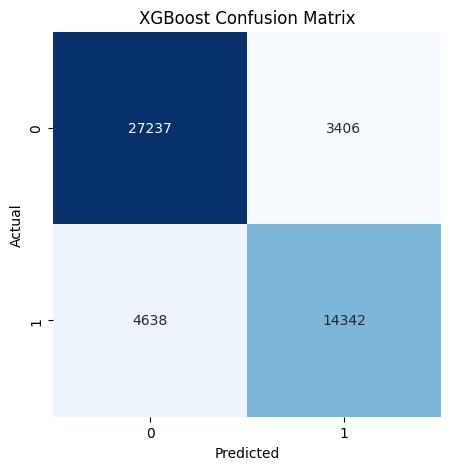

Saved XGBoost model as XGBoost_model.pkl



In [15]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.title(f'XGBoost Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    model_name = f'{name}_model.pkl'
    joblib.dump(model, model_name)
    print(f'Saved {name} model as {model_name}\n')